In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [2]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [3]:
def ppo(data,EMA_fast=[],EMA_slow=[]):
    for pf in EMA_fast:
        for ps in EMA_slow:
            data["ppo_"+str(pf)+'_'+str(ps)]=ta.PPO(data.close,fastperiod=pf,slowperiod=ps,matype=0)
    return data

In [33]:
# Candlestick graph
def candle_graph_ppo(data,nome_coluna_datas="datetime",n=200,**colunas):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    from matplotlib.pyplot import cm
    colors=["r","b","gray","green","w"]
    for cor in range(len(colunas)):
        for key,value in colunas.items():
            ax2.plot(ohlc[nome_coluna_datas], ohlc[value], color = colors[cor], lw=1,label=value)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax2.legend(loc=1,fontsize=8)
    return plt.show()

## Exemplo:

In [4]:
df=ppo(data,EMA_fast=[7,14,21],EMA_slow=[26,36,40])
df.tail(3)

,open,high,low,close,volume,ppo_7_26,ppo_7_36,ppo_7_40,ppo_14_26,ppo_14_36,ppo_14_40,ppo_21_26,ppo_21_36,ppo_21_40
datetime,,,,,,,,,,,,,,
2018-10-21,6490.60,6557.39,6474.47,6509.87,1.052839e+08,0.131794,0.141411,0.239905,-0.809902,-0.800375,-0.702807,-0.285718,-0.276141,-0.178057
2018-10-22,6509.87,6531.23,6460.38,6483.23,2.027669e+08,-0.163106,-0.133204,-0.099155,-1.004607,-0.974958,-0.941195,-0.379401,-0.349564,-0.315588
2018-10-23,6484.32,6490.71,6450.55,6450.55,1.040892e+08,-0.314778,-0.503503,-0.373609,-1.065628,-1.252931,-1.124016,-0.295623,-0.484384,-0.354466


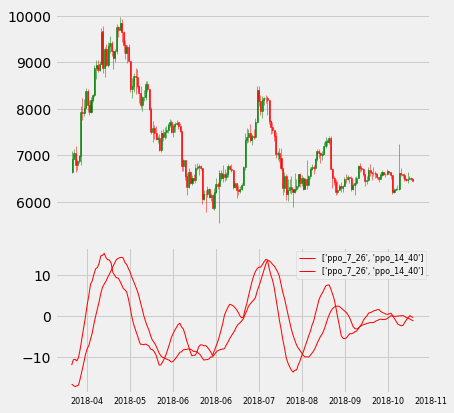

In [38]:
candle_graph_ppo(df,linha=['ppo_7_26','ppo_14_40'])